In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('jordan.csv')

In [3]:
df.dtypes

Year                int64
Planted Area      float64
Harvested Area    float64
Temp_mean         float64
Temp_min          float64
Temp_max          float64
Precipitation     float64
Average Yield     float64
crop               object
Production        float64
dtype: object

In [4]:
# One-Hot Encode categorical features (if any)
categorical_features = [col for col in df if df[col].dtype == object]
for col in categorical_features:
    df = pd.get_dummies(df, columns=[col])

In [5]:
'''df['Planted Area']=df['Planted Area'].astype(int)
df['Harvested Area']=df['Harvested Area'].astype(int)
df['Production']=df['Production'].astype(int)'''

"df['Planted Area']=df['Planted Area'].astype(int)\ndf['Harvested Area']=df['Harvested Area'].astype(int)\ndf['Production']=df['Production'].astype(int)"

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            120 non-null    int64  
 1   Planted Area    120 non-null    float64
 2   Harvested Area  120 non-null    float64
 3   Temp_mean       120 non-null    float64
 4   Temp_min        120 non-null    float64
 5   Temp_max        120 non-null    float64
 6   Precipitation   120 non-null    float64
 7   Average Yield   120 non-null    float64
 8   Production      120 non-null    float64
 9   crop_Barley     120 non-null    bool   
 10  crop_Chickpea   120 non-null    bool   
 11  crop_Lentil     120 non-null    bool   
 12  crop_Vetch      120 non-null    bool   
 13  crop_Wheat      120 non-null    bool   
dtypes: bool(5), float64(8), int64(1)
memory usage: 9.2 KB


In [7]:
corr_matrix = df.corr()

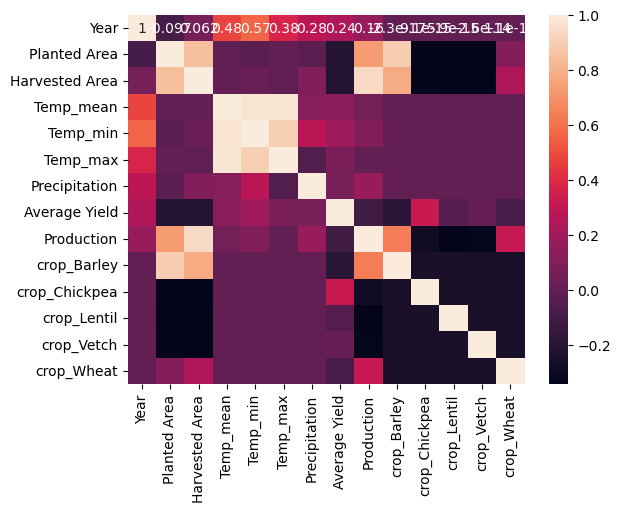

['Year', 'Planted Area', 'Harvested Area', 'Temp_mean', 'Temp_min', 'Temp_max', 'Precipitation', 'Average Yield', 'Production', 'crop_Barley', 'crop_Chickpea', 'crop_Lentil', 'crop_Vetch', 'crop_Wheat']


In [8]:
# Visualize correlation matrix
sns.heatmap(corr_matrix, annot=True)
plt.show()
# Select features with correlation above a threshold
threshold = 0.8
corr_features = [col for col in corr_matrix.columns if any(abs(corr_matrix[col]) > threshold)]
print(corr_features)

In [9]:
correlations = df.corrwith(df['Production'])
print(correlations)

Year              0.162050
Planted Area      0.732012
Harvested Area    0.935576
Temp_mean         0.050504
Temp_min          0.093477
Temp_max          0.007114
Precipitation     0.169525
Average Yield    -0.117689
Production        1.000000
crop_Barley       0.634870
crop_Chickpea    -0.284775
crop_Lentil      -0.338342
crop_Vetch       -0.325990
crop_Wheat        0.314238
dtype: float64


In [10]:
X = df.drop(['Average Yield', 'Production'], axis=1)
y = df['Production']

## Transform

In [11]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X_transformed = pt.fit_transform(X)

In [12]:
Y_log = np.log(y + 1)
print("Original target:", y)
print("Log-transformed target:", Y_log)

Original target: 0       9250.5
1      25433.7
2      19293.0
3      43770.8
4      42526.0
        ...   
115      371.6
116       38.4
117      819.1
118     1012.5
119      570.0
Name: Production, Length: 120, dtype: float64
Log-transformed target: 0       9.132541
1      10.143870
2       9.867549
3      10.686745
4      10.657894
         ...    
115     5.920505
116     3.673766
117     6.709426
118     6.921165
119     6.347389
Name: Production, Length: 120, dtype: float64


In [13]:
print(X_transformed.shape)
print(Y_log.shape)

(120, 12)
(120,)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, Y_log, test_size=0.2, random_state=42)

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [16]:
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)

In [18]:
print("Coefficients:", model.coef_)

Coefficients: [ 2.93845920e-01  1.15819753e+00  7.05721727e-01  6.20108984e-16
 -4.84014014e-02  1.09988903e-16  1.18921539e-01 -7.86511465e-02
  1.93195684e-01 -9.79111035e-02 -1.05644204e-01  8.90107694e-02]


In [19]:
print("Intercept:", model.intercept_)

Intercept: 7.972062385934796


In [20]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import math
# After making predictions on the testing set (y_pred)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred, )
r2 = r2_score(y_test, y_pred)
# Print the performance metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R-squared:", r2)
print(math.sqrt(mse))

Mean Absolute Error (MAE): 0.252857223962769
Mean Squared Error (MSE): 0.11946472857644637
R-squared: 0.9749610346534263
0.34563670027421334


In [21]:
print(X.shape)
print(y.shape)

(120, 12)
(120,)


In [22]:
from sklearn.metrics import mean_squared_error

def rmse(y_test, y_pred):
  """Calculates the Root Mean Squared Error (RMSE)"""
  return np.sqrt(mean_squared_error(y_test, y_pred))

rmse_val = rmse(y_test, y_pred)
print("RMSE:", rmse_val)

RMSE: 0.34563670027421334


Mean Absolute Percentage Error: 3.377822485480663


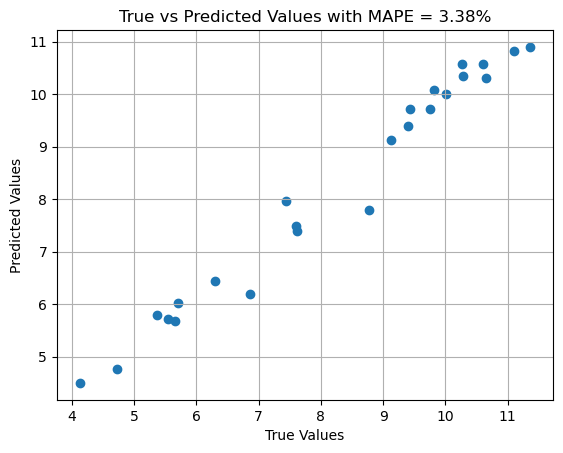

In [23]:
import numpy as np
import matplotlib.pyplot as plt
def mean_absolute_percentage_error(y_test, y_pred):
  """Calculates the Mean Absolute Percentage Error (MAPE)"""
  y_test, y_pred = np.array(y_test), np.array(y_pred)
  return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# Calculate MAPE
mape = mean_absolute_percentage_error(y_test, y_pred)
print("Mean Absolute Percentage Error:", mape)

# Create scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title(f"True vs Predicted Values with MAPE = {mape:.2f}%")
plt.grid(True)
plt.show()

In [24]:
# Create a DataFrame
dfp = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred})
# Calculate the difference
dfp['Difference'] = abs(dfp['True Values'] - dfp['Predicted Values'])
# Sort by difference
df_sorted = dfp.sort_values(by='Difference', ascending=False)
print(df_sorted)

     True Values  Predicted Values  Difference
91      8.766706          7.795373    0.971333
70      6.867662          6.184935    0.682727
88      7.443839          7.955608    0.511769
45     11.369238         10.900229    0.469008
62      5.368776          5.790621    0.421845
64      4.122284          4.496576    0.374292
4      10.657894         10.307640    0.350254
47     10.267436         10.578038    0.310602
55      5.711420          6.017967    0.306547
10      9.432283          9.725409    0.293126
44     11.106747         10.828600    0.278146
31      9.822202         10.074804    0.252602
89      7.612633          7.398890    0.213744
109     5.547908          5.716221    0.168313
107     6.293789          6.445009    0.151220
73      7.597246          7.482058    0.115188
36     10.284879         10.341784    0.056906
26      9.760166          9.719049    0.041116
65      4.730039          4.760982    0.030943
40     10.608731         10.581862    0.026869
104     5.650

In [32]:
dfpr=pd.read_csv('predictions3.csv')

In [33]:
dfpr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            35 non-null     int64  
 1   Planted Area    35 non-null     float64
 2   Harvested Area  35 non-null     float64
 3   Temp_mean       35 non-null     float64
 4   Temp_min        35 non-null     float64
 5   Temp_max        35 non-null     float64
 6   Precipitation   35 non-null     float64
 7   crop            35 non-null     object 
dtypes: float64(6), int64(1), object(1)
memory usage: 2.3+ KB


In [34]:
categorical_features = [col for col in dfpr if dfpr[col].dtype == object]
for col in categorical_features:
    dfpr = pd.get_dummies(dfpr, columns=[col])

In [35]:
dfpr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            35 non-null     int64  
 1   Planted Area    35 non-null     float64
 2   Harvested Area  35 non-null     float64
 3   Temp_mean       35 non-null     float64
 4   Temp_min        35 non-null     float64
 5   Temp_max        35 non-null     float64
 6   Precipitation   35 non-null     float64
 7   crop_Barley     35 non-null     bool   
 8   crop_Chickpea   35 non-null     bool   
 9   crop_Lentil     35 non-null     bool   
 10  crop_Vetch      35 non-null     bool   
 11  crop_Wheat      35 non-null     bool   
dtypes: bool(5), float64(6), int64(1)
memory usage: 2.2 KB


In [36]:
y_pred_new = model.predict(dfpr)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [37]:
y_pred_new

array([ 175652.71705747,  184896.84151169,  200690.36067421,
        183149.19755545,  166359.43865392,  130390.88387794,
         80990.0052967 ,  868176.58103495,  926955.34200314,
       1247908.31024331, 1267007.42068381, 1299931.56157642,
       1131511.62827079,  815371.17544828,   22444.8319409 ,
         13924.48785608,    5489.83068846,    2593.0260238 ,
          1873.16553728,   18935.2347586 ,   31518.20933307,
         10285.61905477,   14804.35707669,   14031.9235298 ,
         15373.57513001,   11293.64895083,    8763.66077009,
          6792.25962226,    7979.83882857,    8070.36192015,
          9654.13019154,    5493.6615626 ,    7236.07267569,
          6627.64354755,    4089.77772984])

In [38]:
list_pred = list(y_pred_new)

In [39]:
list_pred

[175652.71705747364,
 184896.84151169407,
 200690.36067421274,
 183149.19755545468,
 166359.4386539204,
 130390.88387794117,
 80990.00529670423,
 868176.5810349484,
 926955.3420031398,
 1247908.3102433083,
 1267007.4206838105,
 1299931.561576417,
 1131511.6282707895,
 815371.1754482767,
 22444.831940901717,
 13924.48785608146,
 5489.830688455839,
 2593.0260237997363,
 1873.165537283266,
 18935.23475859814,
 31518.209333068156,
 10285.61905477244,
 14804.357076694896,
 14031.923529798689,
 15373.575130009041,
 11293.648950832649,
 8763.660770091159,
 6792.259622255731,
 7979.838828572393,
 8070.361920145684,
 9654.130191535298,
 5493.661562603494,
 7236.07267569046,
 6627.64354755123,
 4089.7777298399433]